In [85]:
import numpy as np
from math import pi,sqrt
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
# import matplotlib as mpl
# mpl.rcParams['text.usetex']=True
# mpl.rcParams['text.latex.unicode']=True
import sympy as sym

In [18]:
def qdef(n,q):
    return (q**(n/2)-q**(-n/2))/(q**(1/2)-q**(-1/2))
    
def nfacq(n,q):
    y=1
    for i in range(1,int(n)+1):
        y*= qdef(i,q)
    return y

def delta(j1,j2,j3,q):
    return (nfacq(-j1+j2+j3,q)*nfacq(j1-j2+j3,q)*nfacq(j1+j2-j3,q)/nfacq(j1+j2+j3+1,q))**0.5

def sixj(j1,j2,j12,j3,j,j23,q):
    fac=delta(j1,j2,j12,q)*delta(j12,j3,j,q)*delta(j2,j3,j23,q)*delta(j1,j23,j,q)
    a1=j1+j2+j12
    a2=j+j3+j12
    a3=j1+j+j23
    a4=j2+j3+j23
    b1=j1+j2+j+j3
    b2=j1+j3+j12+j23
    b3=j2+j+j12+j23
    
    zmin=np.max([a1,a2,a3,a4])
    zmax=np.min([b1,b2,b3])
#     print(zmin,zmax)
    
    w=0
    for z in np.arange(np.ceil(zmin),int(zmax)+1):
        den= nfacq(z-j1-j2-j12,q)*nfacq(z-j12-j3-j,q)*nfacq(z-j2-j3-j23,q)\
            *nfacq(z-j1-j23-j,q)*nfacq(j1+j2+j3+j-z,q)*nfacq(j1+j12+j3+j23-z,q)\
            *nfacq(j2+j12+j+j23-z,q)
        w += (-1)**z* nfacq(z+1,q)/den
    return w*fac

def Fsym(j1,j2,j3,j,j12,j23,q):
    return (-1)**(j1+j2+j3+j)* (qdef(2*j12+1,q)*qdef(2*j23+1,q))**0.5 *sixj(j1,j2,j12,j3,j,j23,q)
    
def Rsym(j1,j2,j,q):
    return (-1)**np.abs(j-j1-j2) * q**((j*(j+1)-j1*(j1+1)-j2*(j2+1))/2)

def qdim(j,k):
    return np.sin((2*j+1)*pi/(k+2))/np.sin(pi/(k+2))

def Nabc(a,b,k):
    # takes two anyons and gives fusion channels
    cmin=np.abs(a-b)
    cmax=np.min([a+b, k-a-b])
    return np.arange(cmin,cmax+1)

def fusion(a,b,c,d,e,f,k):
    elist= Nabc(a,b,k)
    if e in elist:
        dlist= Nabc(e,c,k)
        if d in dlist:
            flist= Nabc(b,c,k)
            if f in flist:
                return True
    return False


In [25]:
from scipy.optimize import fsolve, fmin_cobyla

k=4
# 2d phase diagram
def log_neg_spin_one(p0,p1):
    q= np.exp(1j*2*pi/(k+2))
    a=1
    b=1
    da=qdim(a,k)
    db=qdim(b,k)

    fmin=np.abs(a-b)
    fmax=np.min([a+b, k-a-b])
    flist=np.arange(fmin,fmax+1)
#     print(flist)

    clist=[0,1,2]
    
#     if 1-p0-p1>=0:
    pf=[p0[i_1],p1,1-p0[i_1]-p1]
    for c in clist:
        sf=0
        for i_f in range(len(flist)):
            f= flist[i_f]
            if fusion(a,f,a,c,b,b,k):
                sf+= pf[i_f]*Rsym(f,a,b,q)*Fsym(a,f,a,c,b,b,q)
        rT1 += qdim(c,k)/db* np.abs(sf)
    return np.log(rT1)/np.log(da)
#     else:
#         return 

def constr1(p0,p1):
    return 1-p0-p1

#     rT1=np.zeros(len(p0)) 
#     for i_1 in range(len(p0)):
#         if 1-p0[i_1]-p1>= 0:
#             pf=[p0[i_1],p1,1-p0[i_1]-p1]
#             for c in clist:
#                 sf=0
#                 for i_f in range(len(flist)):
#                     f= flist[i_f]
#                     if fusion(a,f,a,c,b,b,k):
#                         sf+= pf[i_f]*Rsym(f,a,b,q)*Fsym(a,f,a,c,b,b,q)
#                 rT1[i_1] += qdim(c,k)/db* np.abs(sf)
#     return np.log(rT1)/np.log(da)

In [24]:
# def f(x,u,v):
#     return x**2 - u+v

# starting_guess = 1
# print(fsolve(f, starting_guess, args=(19,10)))
p_guess=0.1
p1=0.6
k=10
print(fsolve(log_neg_spin_one,p_guess,args=(p1,k)))

[0.1]


<ipython-input-21-3c08c728adcb>:29: RuntimeWarning: divide by zero encountered in log
  return np.log(rT1)/np.log(da)


In [138]:
# plist=np.arange(0,0.1)

k=20

q= np.exp(1j*2*pi/(k+2))
a=1
b=1
da=qdim(a,k)
db=qdim(b,k)
fmin=np.abs(a-b)
fmax=np.min([a+b, k-a-b])
flist=np.arange(fmin,fmax+1)
clist=[0,1,2]

plist=np.linspace(0,1,200)
p0_f = np.zeros(len(plist))
ln_f = np.zeros(len(plist))

for i_1 in range(len(plist)):
    p1=plist[i_1]
    p_guess= (1-p1)/2
    def log_neg_spin_one(p0):
        pf=[p0,p1,1-p0-p1]
        rT1=0
        for c in clist:
            sf=0
            for i_f in range(len(flist)):
                f= flist[i_f]
                if fusion(a,f,a,c,b,b,k):
                    sf+= pf[i_f]*Rsym(f,a,b,q)*Fsym(a,f,a,c,b,b,q)
            rT1 += qdim(c,k)/db* np.abs(sf)
        return np.log(rT1)/np.log(da)

    def constr1(p0):
        return 1-p0-p1

    p0_f[i_1]= fmin_cobyla(log_neg_spin_one, p_guess, constr1, rhoend=1e-7)
    ln_f[i_1]=log_neg_spin_one(p0_f[i_1])


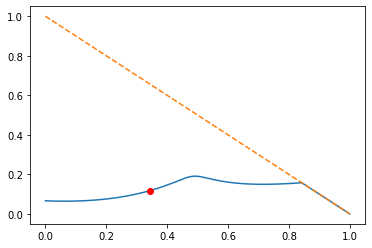

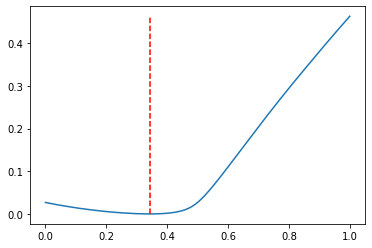

In [139]:
plt.figure()
plt.plot(plist,p0_f,'-')
plt.plot(plist,(1-plist),'--')
plt.plot(1/(da),1/(da*db),'ro')
plt.show()

plt.figure()
plt.plot(plist,ln_f)
plt.plot([1/(da),1/(da)],[np.min(ln_f),np.max(ln_f)],'r--')
plt.show()

In [81]:
k=4
print(qdim(0,k),qdim(1,k),qdim(2,k))

1.0 2.0000000000000004 1.0


In [90]:
# spin-1
k=4
q= np.exp(1j*2*pi/(k+2))
a=1
b=1
da=qdim(a,k)
db=qdim(b,k)
fmin=np.abs(a-b)
fmax=np.min([a+b, k-a-b])
flist=np.arange(fmin,fmax+1)
clist=[0,1,2]

x= sym.Symbol('x')
y= sym.Symbol('y')
z= sym.Symbol('z')

pf=[x,y,z]
rT1=0
for c in clist:
    sf=0
    for i_f in range(len(flist)):
        f= flist[i_f]
        if fusion(a,f,a,c,b,b,k):
            sf+= pf[i_f]*Rsym(f,a,b,q)*Fsym(a,f,a,c,b,b,q)
    rT1 += qdim(c,k)/db* np.abs(sf)

sym.simplify(rT1)

0.5*Abs(-1.0*x + 0.5*y - 0.866025403784439*I*y + 1.0*z + 3.88578058618805e-16*I*z) + 1.0*Abs(1.0*x - 1.48029736616687e-16*y + 2.56395024851141e-16*I*y + 1.0*z + 3.56528680512412e-16*I*z) + 0.5*Abs(1.0*x + 6.16297582203916e-33*I*x + 0.5*y - 0.866025403784438*I*y - 1.0*z - 3.56528680512412e-16*I*z)

In [117]:
# spin-1
k=4
q= np.exp(1j*2*pi/(k+2))
a=1
b=1
da=qdim(a,k)
db=qdim(b,k)
fmin=np.abs(a-b)
fmax=np.min([a+b, k-a-b])
flist=np.arange(fmin,fmax+1)
clist=[0,1,2]

x= sym.Symbol('x')
y= sym.Symbol('y')
z= sym.Symbol('z')

theta_a= np.exp(-1j*2*pi/3)
pf=[x,y,z]
rT1=0
for c in clist:
    sf=0
    for i_f in range(len(flist)):
        f= flist[i_f]
        if fusion(a,f,a,c,b,b,k):
            sf+= pf[i_f]*theta_a*np.conj(Rsym(f,a,b,q))*Fsym(a,f,a,c,b,b,q)*Rsym(a,b,c,q)
    print(sym.simplify(qdim(c,k)/db*sf)) #qdim(c,k)/db* 
    rT1 += qdim(c,k)/db*sf
    
sym.simplify(rT1)

-0.25*x + 0.433012701892219*I*x + 0.5*y + 1.66533453693773e-16*I*y + 0.25*z - 0.433012701892219*I*z
1.0*x + 3.33066907387547e-16*I*x - 1.48029736616687e-16*y - 2.56395024851141e-16*I*y + 1.0*z - 1.11022302462516e-16*I*z
0.25*x - 0.433012701892219*I*x + 0.5*y - 2.77555756156289e-17*I*y - 0.25*z + 0.433012701892219*I*z


1.0*x + 2.22044604925031e-16*I*x + 1.0*y - 2.22044604925031e-16*I*y + 1.0*z - 5.55111512312578e-16*I*z

In [118]:
D=[[1/2,0,-1/2],[0,0,0],[-1/2,0,1/2]]
# np.linalg.det(D)
np.linalg.eig(D)

(array([1.00000000e+00, 1.11022302e-16, 0.00000000e+00]),
 array([[ 0.70710678,  0.70710678,  0.        ],
        [ 0.        ,  0.        ,  1.        ],
        [-0.70710678,  0.70710678,  0.        ]]))

In [140]:
# m matrix

# spin-1
k=4
q= np.exp(1j*2*pi/(k+2))
a=1
b=1
da=qdim(a,k)
db=qdim(b,k)
fmin=np.abs(a-b)
fmax=np.min([a+b, k-a-b])
flist=np.arange(fmin,fmax+1)
clist=[0,1,2]

x= sym.Symbol('x')
y= sym.Symbol('y')
z= sym.Symbol('z')

theta_a= np.exp(-1j*4*pi/(k+2))
pf=[x,y,z]
m_c=np.zeros((3,3),dtype=np.complex128)
for c in clist:
    for i_f in range(len(flist)):
        f= flist[i_f]
        if fusion(a,f,a,c,b,b,k):
            m_c[c,i_f]= qdim(c,k)/db*theta_a*np.conj(Rsym(f,a,b,q))*Fsym(a,f,a,c,b,b,q)*Rsym(a,b,c,q)
    
print(m_c)
print(np.linalg.matrix_rank(m_c),np.linalg.matrix_rank(m_c.imag))
print(np.linalg.eig(m_c.imag))

[[-2.50000000e-01+4.33012702e-01j  5.00000000e-01+8.32667268e-17j
   2.50000000e-01-4.33012702e-01j]
 [ 1.00000000e+00+4.44089210e-16j -1.48029737e-16-2.56395025e-16j
   1.00000000e+00+5.55111512e-17j]
 [ 2.50000000e-01-4.33012702e-01j  5.00000000e-01-1.11022302e-16j
  -2.50000000e-01+4.33012702e-01j]]
3 1
(array([ 8.66025404e-01, -2.56395025e-16, -1.96261557e-16]), array([[-7.07106781e-01, -3.36366478e-15,  1.36374089e-01],
       [-4.31775426e-16,  1.00000000e+00,  9.81225874e-01],
       [ 7.07106781e-01, -3.13364913e-15,  1.36374089e-01]]))


In [86]:
# spin-1/2

k=2
q= np.exp(1j*2*pi/(k+2))
a=1/2
b=1/2
da=qdim(a,k)
db=qdim(b,k)
fmin=np.abs(a-b)
fmax=np.min([a+b, k-a-b])
flist=np.arange(fmin,fmax+1)
clist=[0,1]

x= sym.Symbol('x')
y= sym.Symbol('y')

pf=[x,y]
rT1=0
for c in clist:
    sf=0
    for i_f in range(len(flist)):
        f= flist[i_f]
        if fusion(a,f,a,c,b,b,k):
            sf+= pf[i_f]*Rsym(f,a,b,q)*Fsym(a,f,a,c,b,b,q)
    rT1 += qdim(c,k)/db* np.abs(sf)

sym.simplify(rT1)

0.707106781186548*Abs(1.0*x + 1.0*y*(6.12323399573677e-17 - 1.0*I)) + 0.707106781186547*Abs(1.0*x - 1.0*y*(6.12323399573677e-17 - 1.0*I))